In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **The Dataset**

In [ ]:
df = pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


This is a dataset we found on Kaggle about Employees' Salary, it contains 6 variables : Age of salaries, their gender, education level, job, experience and salary. Our goal is to analyze this dataset and understand the salary distribution.

In [ ]:
df.shape

(375, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
# Null values in each column of df
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


To continue our analysis, we can either delete these two rows or remplace the null values. Since our dataset has only 375 rows (which is not a lot) we decide to replace the null values.

In [ ]:
# Replacing Null values for numerical variables

df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())

In [ ]:
# For categorical variables

df['Gender'] = df['Gender'].fillna(df['Gender'].value_counts().index[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].value_counts().index[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].value_counts().index[0])

Now let's check for null values again

In [ ]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

No null values

In [ ]:
# Outliers :
import plotly.express as px

fig = px.histogram(df, x='Years of Experience',marginal='box', nbins = 25, title= '')
fig.update_layout()
fig.show()

The last bin (from 24.9 to 25 years of experience) looks like it contains some outliers. Let's check if this is true

In [ ]:
df.loc[df['Years of Experience'] >= 24]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0
93,52.0,Female,Master's,Senior Marketing Manager,25.0,170000.0
121,53.0,Male,Master's,Director of Marketing,25.0,180000.0


Since these employees are Seniors, and they are +50 years old, we can accept these values (and not consider them as outliers)

In [ ]:
fig = px.histogram(df, x='Salary',marginal='box', nbins = 25, title= 'Salary Distribution')
fig.update_layout()
fig.show()

In [ ]:
df.loc[df['Salary'] >= 250000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0


We found these two employers in the previous analysis of outliers, so we keep them in the dataset. The goal of keeping these employees is to understand years of experience, job title, and education level affect the salary.

# **Exploratory Data Analysis**

In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,375.000000,375.000000,375.000000
mean,37.431635,10.030831,100577.345845
std,7.050146,6.539452,48110.856588
min,23.000000,0.000000,350.000000
25%,31.500000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
df['Gender'].value_counts()

Gender
Male      196
Female    179
Name: count, dtype: int64

In [ ]:
pd.set_option("display.max_rows", None)
df['Job Title'].value_counts()

Job Title
Director of Marketing                    14
Director of Operations                   11
Senior Business Analyst                  10
Senior Marketing Analyst                  9
Senior Marketing Manager                  9
Junior Business Analyst                   8
Senior Financial Analyst                  7
Junior Financial Analyst                  7
Junior Business Development Associate     7
Senior Project Manager                    7
Senior Data Scientist                     7
Senior Software Engineer                  6
Junior Marketing Coordinator              6
Senior Product Manager                    6
Senior Financial Manager                  5
Junior Operations Analyst                 5
Junior Project Manager                    5
Junior Marketing Specialist               5
Senior Product Designer                   5
Senior Operations Manager                 5
Senior Project Coordinator                5
Senior Data Engineer                      4
Senior Marketing Speci

In [ ]:
df['Education Level'].value_counts()

Education Level
Bachelor's    226
Master's       98
PhD            51
Name: count, dtype: int64

In [ ]:
df[["Years of Experience","Age","Salary"]].groupby(df["Gender"]).mean()

,Years of Experience,Age,Salary
Gender,,,
Female,10.011173,37.581006,97011.173184
Male,10.048784,37.295221,103834.207611


We can see here that the average salary for females is ≈
 6.73% less than of males.

In [ ]:
df[["Years of Experience","Age","Salary"]].groupby(df["Education Level"]).mean()

,Years of Experience,Age,Salary
Education Level,,,
Bachelor's,6.993636,34.340103,74984.534034
Master's,13.397959,40.765306,129795.918367
PhD,17.019608,44.725490,157843.137255


Average salary increases with the years of studies; employees with a PhD get paid more.   
The average salary for **Bachelor's degree holders is  ≈ 42.23% less** than that for **Master's** degree holders.   
The average salary for **Bachelor's degree holders is  ≈ 52.49% less** than that for **PhD** holders.   
The average salary for **Master's degree holders is  ≈ 17.77% less** than that for **PhD** holders.

In [ ]:
fig = px.scatter(df, x='Years of Experience', y ='Salary', color ='Gender', title= 'Salary by Years of Experience', opacity =0.8 )
fig.show()

We can clearly see a trend that an increase in years of experience corresponds to a rise in salary.


**The lines of codes below were used to correct a value shown in the scatter plot of 350 salary which was incorrect, and the scatter plot above is after the correction.**

In [ ]:
df.loc[df["Salary"] == 350]  #this value is probably an outlier, this is the only employee who gets paid 350, let's check

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0


In [ ]:
df.loc[df["Job Title"] == 'Junior Business Operations Analyst']

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
218,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,35000.0
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0


So the salary of the employee in row 259 should be corrected to 35000

In [ ]:
df.Salary[df.Salary==350.0] = 35000.0

<ipython-input-25-af9545cca312>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



We will update the df.desribe() and other codes above.

In [ ]:
fig = px.scatter(df, x='Job Title', y ='Salary', color ='Gender', title= 'Salary by Job Title', opacity =0.8,  width=1000, height=1000 )
fig.show()

Some jobs have only Female Employees (Junior Operations Coordinator, .. , HR Manager) and other jobs have predominantly male employees, with a small presence of female employees(Senior Scientist, Sales Manager, Operations Manager..)       
Jobs such as VP of Finance, Director, CEO, Chief Technology Officer, and Chief Data Officer, which have salaries ranging from 200k to 250k, are predominantly held by male employees.

In [ ]:
fig = px.histogram(df, x='Job Title', y ='Salary', color ='Gender', title= 'Salary by Job Title', opacity =0.8,  width=1000, height=1000 )
fig.show()

In [ ]:
fig = px.histogram(df, x='Education Level', y ='Salary', color ='Gender', title= 'Salary by Education Level', opacity =0.8,  width=1000, height=900 )
fig.show()

In [ ]:
df['Education Level'].value_counts()

Education Level
Bachelor's    226
Master's       98
PhD            51
Name: count, dtype: int64

The sum of salary for PhD holders is the smallest while it's the max for Bachelor holders, this without forgetting the fact that employees with PhD are 51 which is only 13.6% of employees.    
If we had the same number of employees with each degree, the total salary of PhD holders would be the highest.

In [ ]:
fig = px.scatter(df, x='Age', y ='Salary', color ='Gender', title= 'Salary by Age', opacity =0.8,  width=1000, height=900 )
fig.show()

As employees get older, their salaries increase, which is normal since they gain years of experience.   
We can observe a clear trend: as age increases, so does salary

# **Linear Regression**

We will use a simple linear regression to understand how each of the employees' characteristics affects their salary.

Text(0.5, 1.0, 'Heat Map')

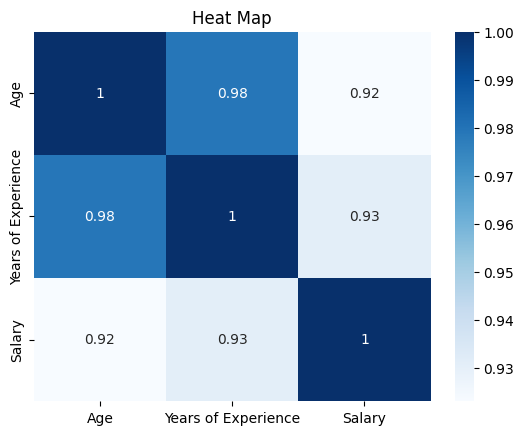

In [ ]:
matrix = df.corr(numeric_only=True)

sns.heatmap(matrix, cmap='Blues', annot = True)
plt.title('Heat Map')

We will only keep Years of Experience for the first model since it is correlated with Age.

In [ ]:
#Salary and Years of Experience
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['Years of Experience']]
y = df['Salary']

# Fitting the model
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients", model.coef_,"Intercept", model.intercept_)

Coefficients [6826.028882] Intercept 32199.00305094995


When all other factors are held constant, one additional year of experience is associated with an average increase in salary of 6844.51.    
The intercept of 31921.21 represents the estimated average salary for individuals with zero years of experience.

In [ ]:
#Salary and Education Level : but first we need to turn it into a numerical variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#Transform the Education Level column
df['Education_encoded'] = label_encoder.fit_transform(df['Education Level'])

df[['Education_encoded','Education Level']]

,Education_encoded,Education Level
0,0,Bachelor's
1,1,Master's
2,2,PhD
3,0,Bachelor's
4,1,Master's
5,0,Bachelor's
6,1,Master's
7,0,Bachelor's
8,0,Bachelor's
9,2,PhD


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['Education_encoded']]
y = df['Salary']

# Fitting the model
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients", model.coef_,"Intercept", model.intercept_)

Coefficients [44467.83701928] Intercept 76953.56610088849


This means : **Salary = 76953.57+ 44467.84 * Education Level**    
The coefficient indicates that each step up in education level (from Bachelor's to Master's, and from Master's to PhD) is associated with an **average increase** in salary of **44467.84**.   
The model suggests that higher educational levels are associated with significantly higher salaries.

In [ ]:
#Salary with Years of Experience, Gender and Education Level:
label_encoder = LabelEncoder()

#Transform the Education Level column
df['Gender_'] = label_encoder.fit_transform(df['Gender'])

model = LinearRegression()

X = df[['Education_encoded','Years of Experience','Gender_']]
y = df['Salary']

# Fitting the model
model.fit(X, y)

LinearRegression()

In [ ]:
print("Coefficients", model.coef_,"Intercept", model.intercept_)

Coefficients [12717.73021244  5995.1217969   7662.44842674] Intercept 29745.995856301088


**Salary = 29745.996 + 12717.73 * Education Level + 5995.12 * Years of Experience + 7662.45 * Gender**

- The intercept represents the baseline salary for a female with the lowest level of education and no experience, which is 29745.996.
- The model suggests that each additional level of education increases the salary by approximately 12717.73.
- Each additional year of experience increases the salary by approximately 5995.12.
- Being male is associated with an increase in salary of approximately 7662.45 compared to being female, all else being equal.


**CONCLUSION :**   
The regression model demonstrates that education and experience are significant predictors of salary, with higher levels of both leading to increased earnings. However, the observed gender disparity indicates that other factors may also be influencing salary differences, pointing to the need for continued efforts toward achieving pay equity.

This data analysis project can help recruiters and employers determine the key factors that contribute to salary determination and highlight areas where targeted actions can promote fair and equitable compensation practices.